# Analysis of recruiting data vs success outcomes

In [1]:
# import dependencies and read in needed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fbsRecruitingFrame = pd.read_csv("Data/fbsRecruitingData.csv")
fbsWinLossFrame = pd.read_csv("Data/fbsWinLossData.csv")
fbsWinLossFrame = fbsWinLossFrame[['season','team','games','wins','losses','ties','color']]

In [2]:
# combine data
comboFrame = pd.merge(fbsRecruitingFrame,fbsWinLossFrame, on= ['season','team','color'], how='outer')
comboFrame = comboFrame[comboFrame['conference'].isin(['ACC','Pac-10','Pac-12','Big Ten','SEC','Big 12'])]
comboFrame = comboFrame.replace('Pac-10','Pac-12')
comboFrame.conference.unique()

array(['SEC', 'Pac-12', 'Big 12', 'ACC', 'Big Ten'], dtype=object)

In [3]:
# create some percentage metrics to normalize data
comboFrame['winPct'] = comboFrame['wins']/comboFrame['games']*100

In [4]:
# get average recruiting rank and win percentage of each team
groupedTeam = comboFrame.groupby(['team','conference','color'])

groupedStats = pd.DataFrame({'avgPoints':groupedTeam['recruitingPoints'].sum()/groupedTeam['recruitingPoints'].count(),
                             'avgWinPct':groupedTeam['winPct'].sum()/groupedTeam['winPct'].count(),
                             'numSeasons':groupedTeam['winPct'].count()
                            })
groupedStats = groupedStats.reset_index()
groupedStats

,team,conference,color,avgPoints,avgWinPct,numSeasons
0,Alabama,SEC,#690014,283.966250,83.682984,16
1,Arizona,Pac-12,#002449,186.649375,47.800117,16
2,Arizona State,Pac-12,#942139,202.505000,57.553904,16
3,Arkansas,SEC,#9c1831,212.593750,48.983829,16
4,Auburn,SEC,#03244d,252.880000,68.815559,16
...,...,...,...,...,...,...
64,Wake Forest,ACC,#9E7E38,151.818750,46.813083,16
65,Washington,Pac-12,#2B2F64,208.059375,49.821533,16
66,Washington State,Pac-12,#94022a,172.148125,43.054341,16
67,West Virginia,Big 12,#FFC600,196.235000,58.049242,8


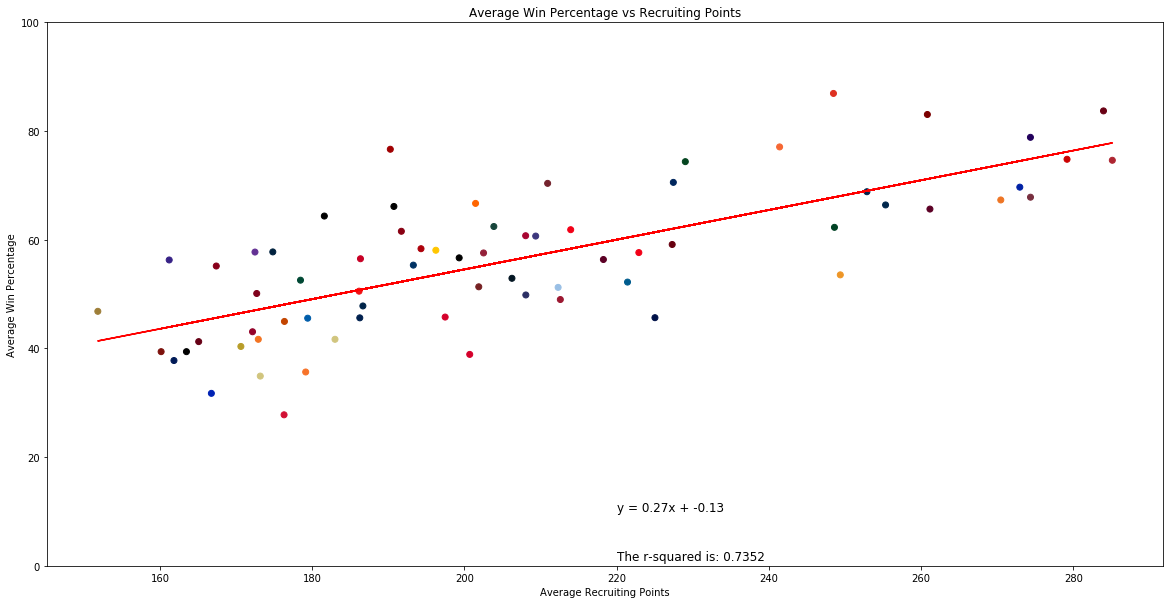

In [5]:
# create scatter/line plot of average win percentage vs average recruiting points
xvalues = groupedStats['avgPoints']
yvalues = groupedStats['avgWinPct']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,10))
plt.scatter(xvalues,yvalues,color=groupedStats['color'])
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(220,10),fontsize=12,color="black")
plt.annotate(f"The r-squared is: {round(rvalue,4)}",(220,1),fontsize=12,color="black")
plt.title('Average Win Percentage vs Recruiting Points')
plt.xlabel('Average Recruiting Points')
plt.ylabel('Average Win Percentage')
plt.ylim(0,100)
# save figure
plt.savefig("Figures/AverageWinPctVsRecruitingPts.png")

In [6]:
# get top two and bottom two performing teams from each conference that have been there all the years
groupedStatsTime = groupedStats[groupedStats['numSeasons']==16]

groupedStatsTime = groupedStatsTime.sort_values(by=['conference','avgWinPct'])
confGrouped = groupedStatsTime.groupby('conference')

confBestWorstTeams = pd.concat([confGrouped.head(2),confGrouped.tail(2)])
confBestWorstTeams = confBestWorstTeams.sort_values(by=['conference','avgWinPct'])
confBestWorstTeams = confBestWorstTeams[['team','conference']]

confBestWorst = pd.merge(confBestWorstTeams,comboFrame,on=['conference','team'],how='inner')
confBestWorst

,team,conference,season,id,mascot,abbreviation,division,color,recruitingRank,recruitingPoints,games,wins,losses,ties,winPct
0,Duke,ACC,2004,150,Blue Devils,DUKE,NaN,#001A57,67.0,107.79,11,2,9,0,18.181818
1,Duke,ACC,2005,150,Blue Devils,DUKE,Coastal,#001A57,55.0,140.17,11,1,10,0,9.090909
2,Duke,ACC,2006,150,Blue Devils,DUKE,Coastal,#001A57,51.0,152.48,12,0,12,0,0.000000
3,Duke,ACC,2007,150,Blue Devils,DUKE,Coastal,#001A57,77.0,126.41,12,1,11,0,8.333333
4,Duke,ACC,2008,150,Blue Devils,DUKE,Coastal,#001A57,67.0,145.79,12,4,8,0,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Alabama,SEC,2015,333,Crimson Tide,ALA,West,#690014,1.0,311.10,13,12,1,0,92.307692
316,Alabama,SEC,2016,333,Crimson Tide,ALA,West,#690014,1.0,302.04,13,13,0,0,100.000000
317,Alabama,SEC,2017,333,Crimson Tide,ALA,West,#690014,1.0,323.87,12,11,1,0,91.666667
318,Alabama,SEC,2018,333,Crimson Tide,ALA,West,#690014,5.0,289.94,13,13,0,0,100.000000


Done with ACC
Done with Big 12
Done with Big Ten
Done with Pac-12
Done with SEC


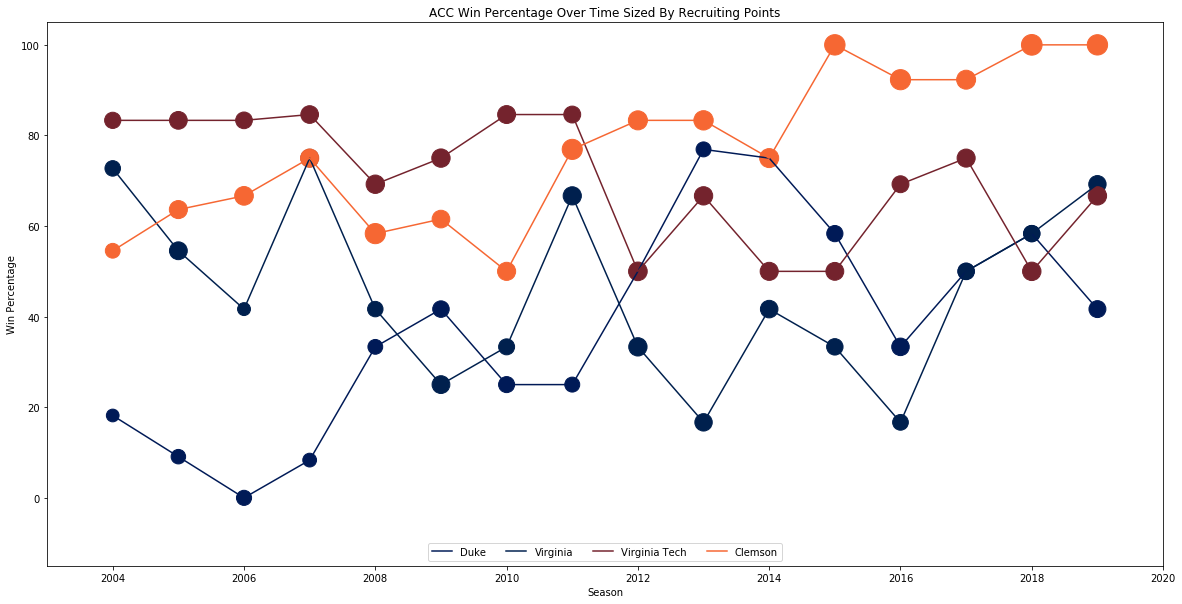

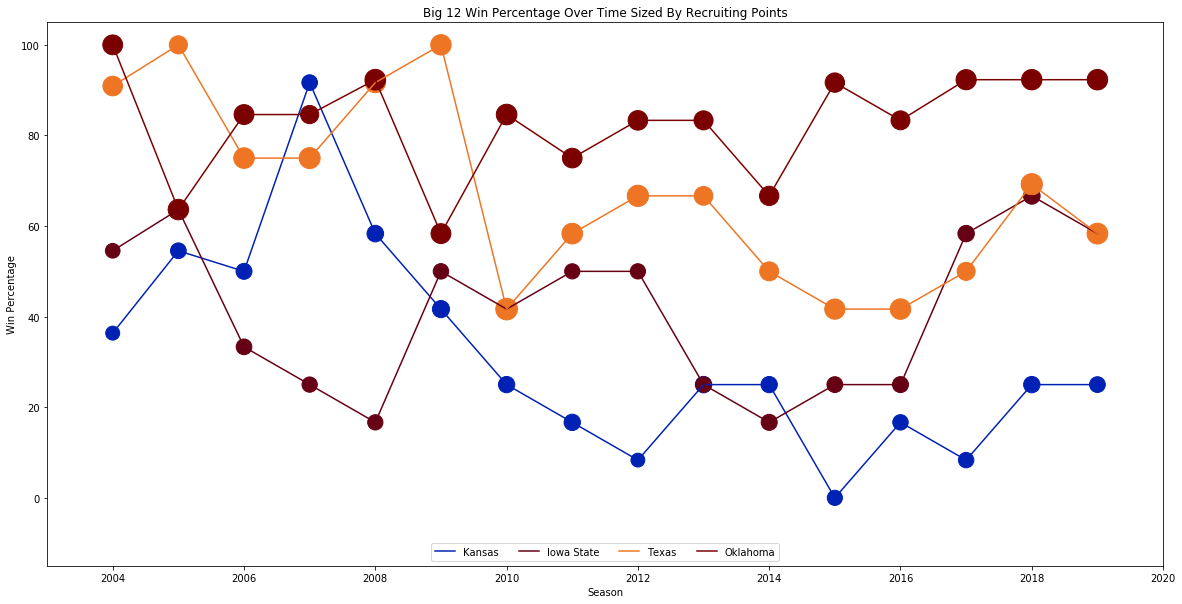

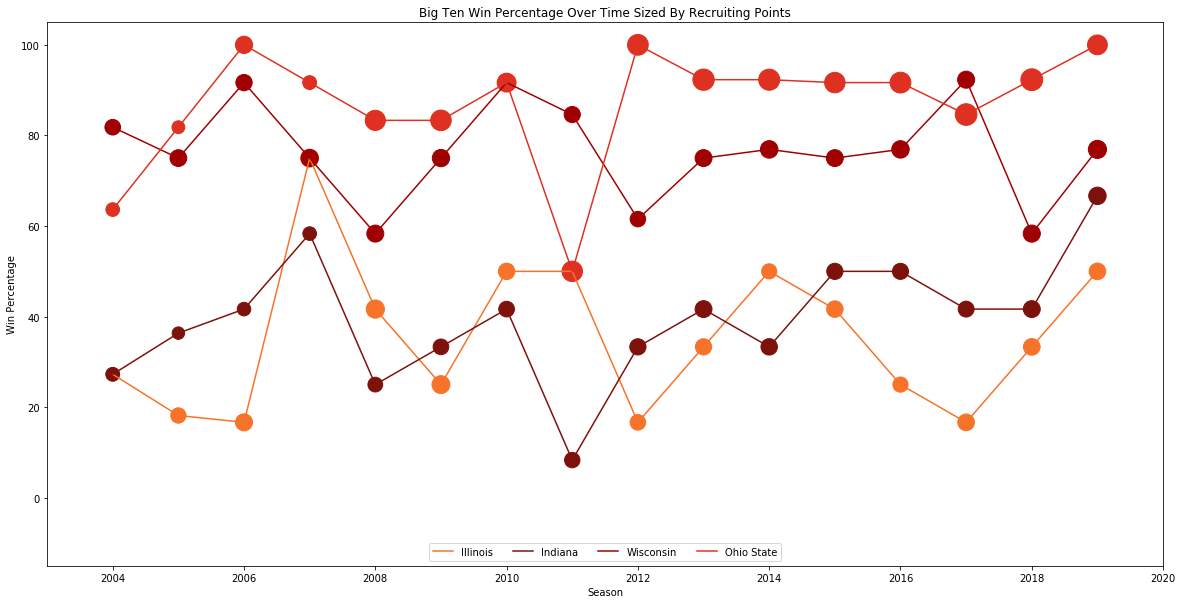

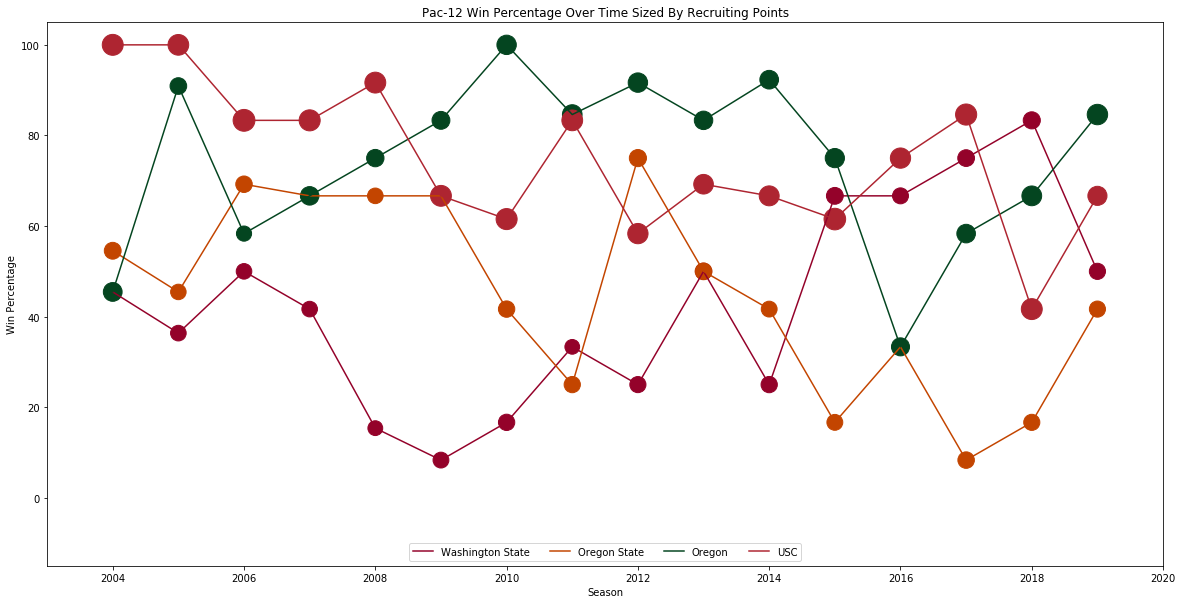

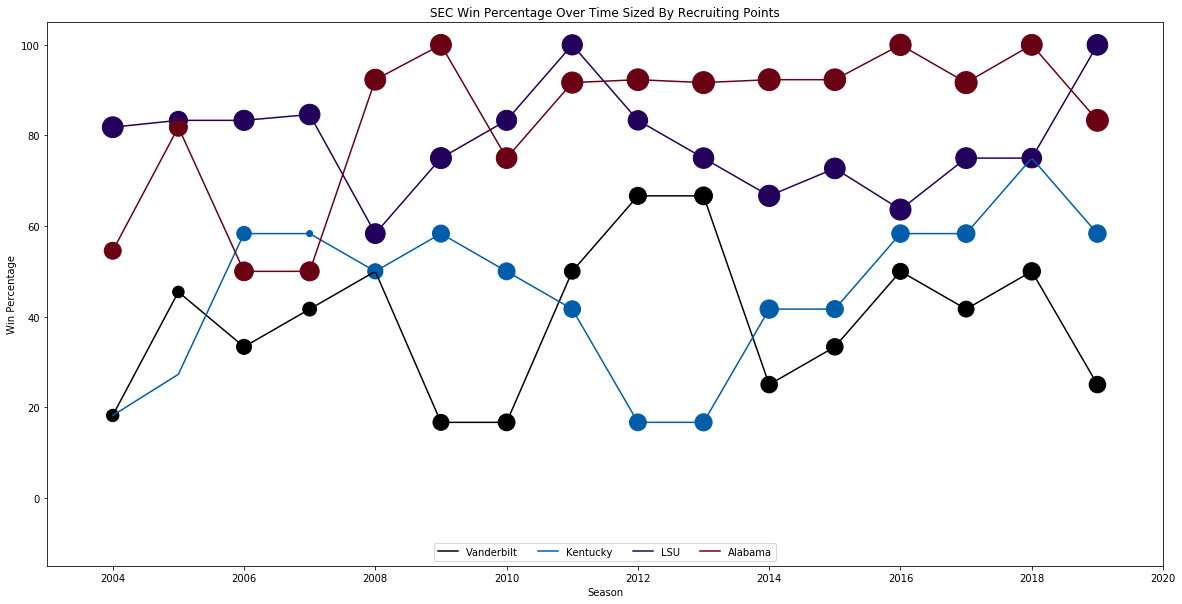

In [7]:
# create figure of win percentage over time by conference using recruiting rank as the size
for c in confBestWorst['conference'].unique():
    confframe = confBestWorst[confBestWorst['conference'] == c]
    fig,ax = plt.subplots()
    for team in confframe['team'].unique():
        subframe = confframe[confframe['team']==team]
        xvalues = subframe['season']
        yvalues = subframe['winPct']
        sizes = [s * 1.5 for s in subframe['recruitingPoints']]
        colors = str(subframe['color'].unique()[0])    
        ax.scatter(xvalues,yvalues, s=sizes, color=colors)
        ax.plot(xvalues,yvalues,color=colors, label=team)
        
    fig.set_figheight(10)
    fig.set_figwidth(20)
    plt.title(f"{c} Win Percentage Over Time Sized By Recruiting Points")
    plt.xlabel("Season")
    plt.ylabel("Win Percentage")
    plt.ylim(-15,105)
    plt.xlim(2003,2020)
    plt.legend(loc='lower center',ncol=4)
    plt.savefig(f"Figures/{c}WinPctOverTimeRecruiting")
    print(f"Done with {c}")